Initial shortest paths: {'O': 0, 'A': 2, 'B': 4, 'C': 4, 'D': 8, 'E': 7, 'F': 14, 'T': 13}
Shortest path from O to T: ['O', 'A', 'B', 'D', 'T']


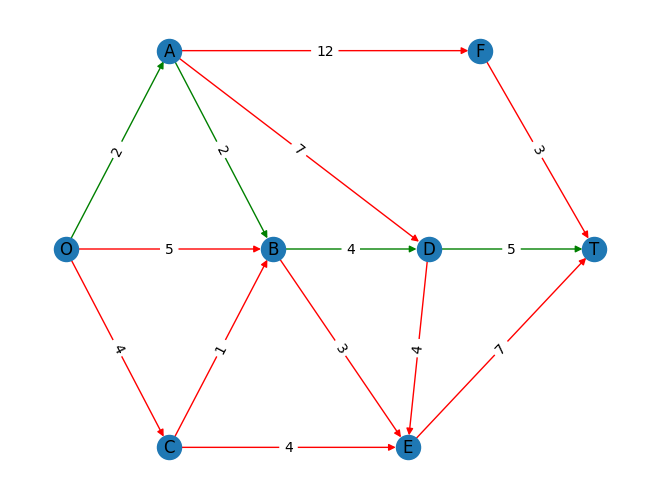

Updated shortest paths: {'O': 0, 'A': 2, 'B': 3, 'C': 2, 'D': 7, 'E': 6, 'F': 14, 'T': 12}
Shortest path from O to T after update: ['O', 'C', 'B', 'D', 'T']


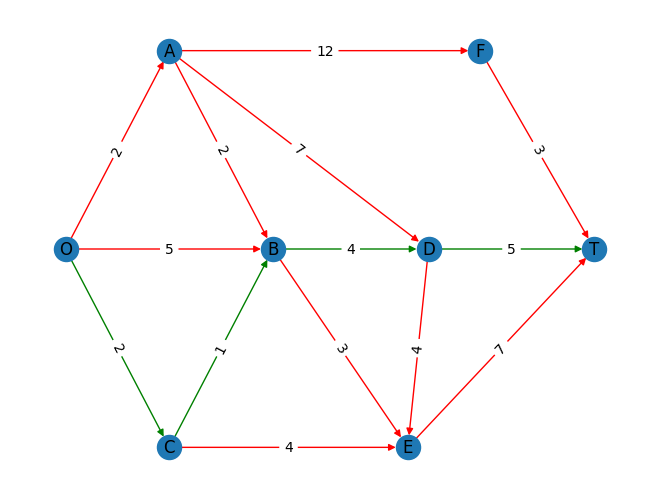

In [1]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# Define the graph
graph = {
    'O': {'A': 2, 'B': 5, 'C': 4},
    'A': {'B': 2, 'D': 7, 'F': 12},
    'B': {'D': 4, 'E': 3},
    'C': {'B': 1, 'E': 4},
    'D': {'E': 4, 'T': 5},
    'E': {'T': 7},
    'F': {'T': 3},
    'T': {}
}

def dijkstra(graph, start):
    # Initialize the distance dictionary with infinite distances
    distance = {node: float('infinity') for node in graph}
    distance[start] = 0

    # Initialize the priority queue and the path dictionary
    queue = [(0, start)]
    path = {node: [] for node in graph}
    path[start] = [start]

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        # Skip if the node was visited
        if current_distance > distance[current_node]:
            continue

        for neighbor, weight in graph[current_node].items():
            distance_candidate = distance[current_node] + weight

            # Only update if the new path is shorter
            if distance_candidate < distance[neighbor]:
                distance[neighbor] = distance_candidate
                path[neighbor] = path[current_node] + [neighbor]
                heapq.heappush(queue, (distance_candidate, neighbor))

    return distance, path

def update_edge(graph, start, end, new_weight):
    graph[start][end] = new_weight
    return graph

def draw_graph(graph, path):
    G = nx.DiGraph()

    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    edge_colors = ['green' if edge in zip(path, path[1:]) else 'red' for edge in G.edges()]

    pos = {'O': (0, 0), 'A': (1, .7), 'B': (2, 0), 'C': (1, -0.7), 'D': (3.5, 0), 'E': (3.3, -0.7), 'F': (4., .7), 'T': (5.1, 0)}
    nx.draw(G, pos, with_labels=True, edge_color=edge_colors)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.show()

# Calculate shortest paths
distance, path = dijkstra(graph, 'O')
print('Initial shortest paths:', distance)
print('Shortest path from O to T:', path['T'])

# Draw initial graph
draw_graph(graph, path['T'])

# Update weight of an edge
graph = update_edge(graph, 'O', 'C', 2)

# Recalculate shortest paths
distance, path = dijkstra(graph, 'O')
print('Updated shortest paths:', distance)
print('Shortest path from O to T after update:', path['T'])

# Draw updated graph
draw_graph(graph, path['T'])